# Compare kinematic distributions between different runs
last edit Feb-2, 2023

## Imports and definitions

In [2]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [3]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [4]:
figures_path = '/Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/'

# (1) Load data and apply selection cuts not previously imposed
1 run from 10.2 GeV, 1 run from 10.4 GeV, 1 run from 10.6 GeV

In [5]:
run_10_2_GeV = 6421
run_10_4_GeV = 11362
run_10_6_GeV = 6164
runs         = [run_10_2_GeV, run_10_4_GeV, run_10_6_GeV]
run_colors   = ['royalblue','forestgreen','salmon']

In [6]:
data_path = "/Users/erezcohen/Desktop/data/BAND/SIDIS_skimming/sidisdvcs/sidisdvcs_31Jan2023_commit_2e77f15/"
df_dict  = dict()
for run in [run_10_2_GeV, run_10_4_GeV, run_10_6_GeV]:
    energy = beam_energy_from_run(run)
    for pi_ch,pi_print in zip(pi_charge_names,pi_prints):
        df = pd.read_csv(data_path + "skimmed_SIDIS_sidisdvcs_%06d_e_%s_selected_eepi_kinematics.csv"%(run,pi_ch))
        df_dict['%.1f GeV %s'%(energy,pi_ch)] = df
print('Done.');        

Done.


# (2) Charge per run - and weights

In [7]:
run_beam_charges = pd.read_csv('/Users/erezcohen/Desktop/data/BAND/metaData/rgb_all_runs.csv');

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/beamCharge_per_run.pdf


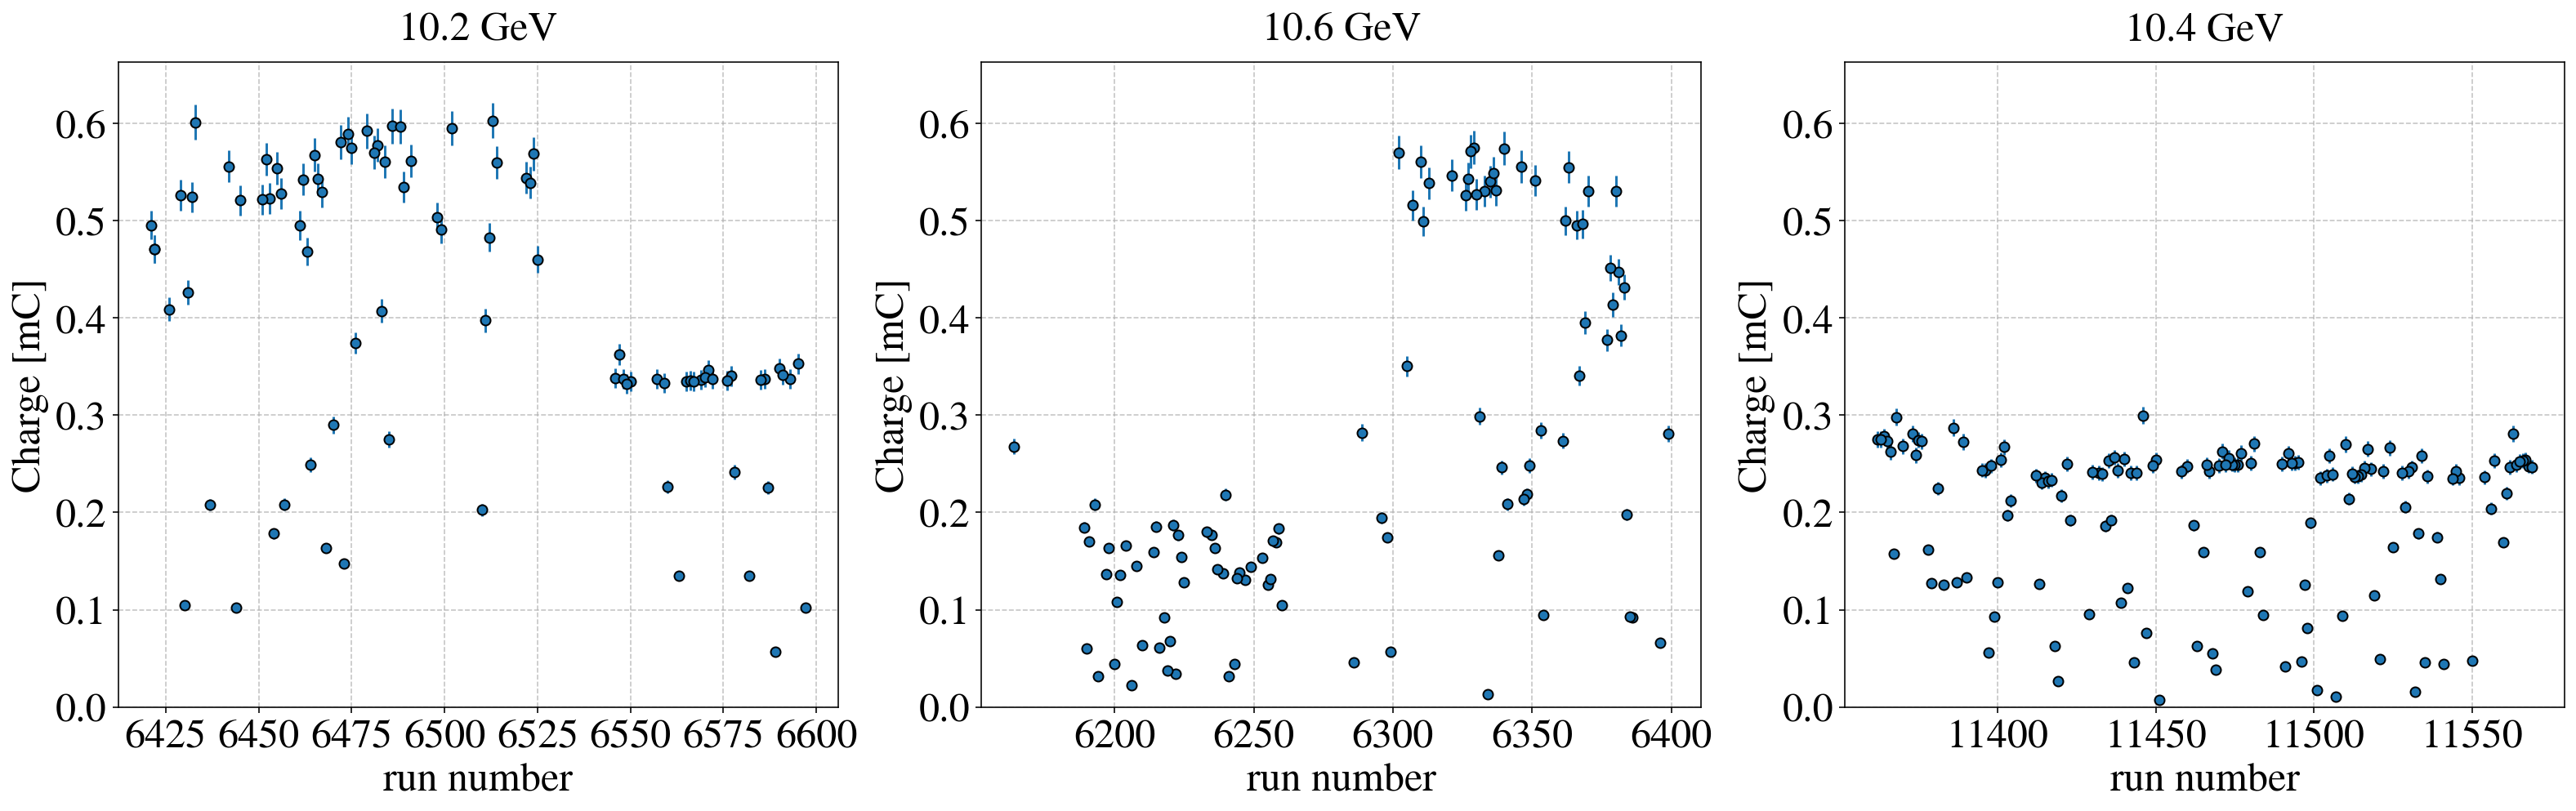

In [9]:
ylim = (0,1.1*np.max(run_beam_charges['Beam Charge [nC]']*1e-6))
fig = plt.figure(figsize=(22,7),tight_layout=True)
for Ebeam,E_idx in zip([10.2,10.6,10.4],[1,2,3]):
    beam_charges = run_beam_charges[run_beam_charges.Ebeam==Ebeam]
    ax = fig.add_subplot(1,3,E_idx)
    plt.errorbar(x=beam_charges.runnum, 
                 y=beam_charges['Beam Charge [nC]']*1e-6, yerr=beam_charges['Beam Charge [nC]']*0.03*1e-6,
                 marker='o', markeredgecolor='k',linestyle='',capthick=2
                );
    set_axes(ax,'run number','Charge [mC]',title='%.1f GeV'%Ebeam,
             do_add_legend=False,ylim=ylim,do_add_grid=True);

# save_figure(filename = figures_path+'beamCharge_per_run' + '.pdf')
save_figure(filename = figures_path+'beamCharge_per_run' + '.pdf')

# (3) Kinematical coverage

## auxiliary

In [10]:
def plot_var_comparison_between_runs(var='Q2', 
                                     bins = np.linspace(2,7,101),
                                     xlabel='$Q^2$ [(GeV/c)$^2$]',
                                     ylabel='Frequency [a.u.]', # 'Yield [Events/nC]' for using ScaleFactor
                                    ):    
    fig = plt.figure(figsize=(16,6),tight_layout=True)

    for pi_ch,pi_print,pi_label,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,[1,2]):
        ax = fig.add_subplot(1,2,pi_idx)
        for run,color in zip(runs,run_colors):
            energy = beam_energy_from_run(run)    
            df = df_dict['%.1f GeV %s'%(energy,pi_ch)]
            plot_step_hist( df[var], bins=bins, color=color,
                           # ScaleFactor=weight_per_run[run], 
                           density=True,
                          label='%.1f GeV, run %d'%(energy,run))
        set_axes(ax,xlabel,
                 ylabel if pi_idx==1 else '',
                 title = "$d(e,e'"+pi_label+")$",
                 do_add_legend=True if pi_idx==1 else False,
                 do_add_grid=True,
                 xlim=(np.min(bins),np.max(bins)))
    save_figure(filename = figures_path + 'run_period_comparison_'+ var + '.pdf')    

## (3.1) 1D variables $Q^2$, $x_B$, $z$... 

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/run_period_comparison_Q2.pdf


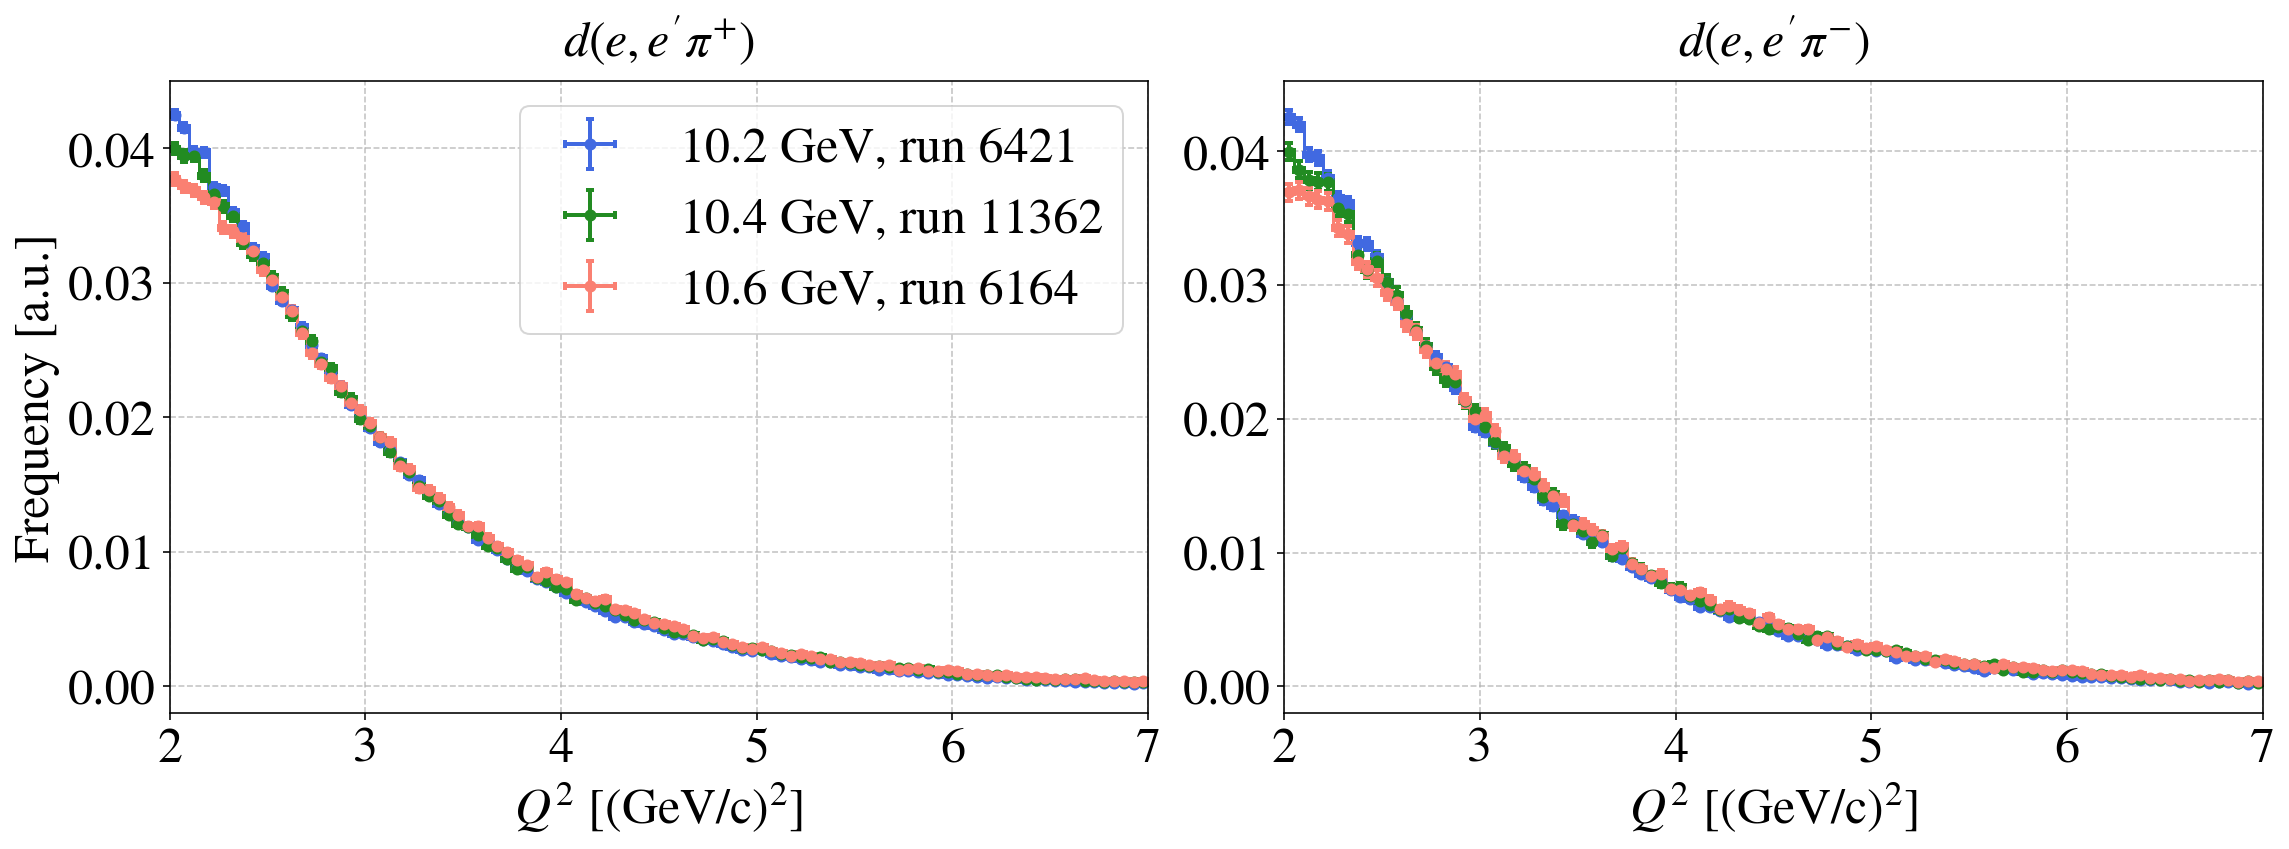

In [11]:
plot_var_comparison_between_runs('Q2',bins = np.linspace(2,7,101))

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/run_period_comparison_xB.pdf


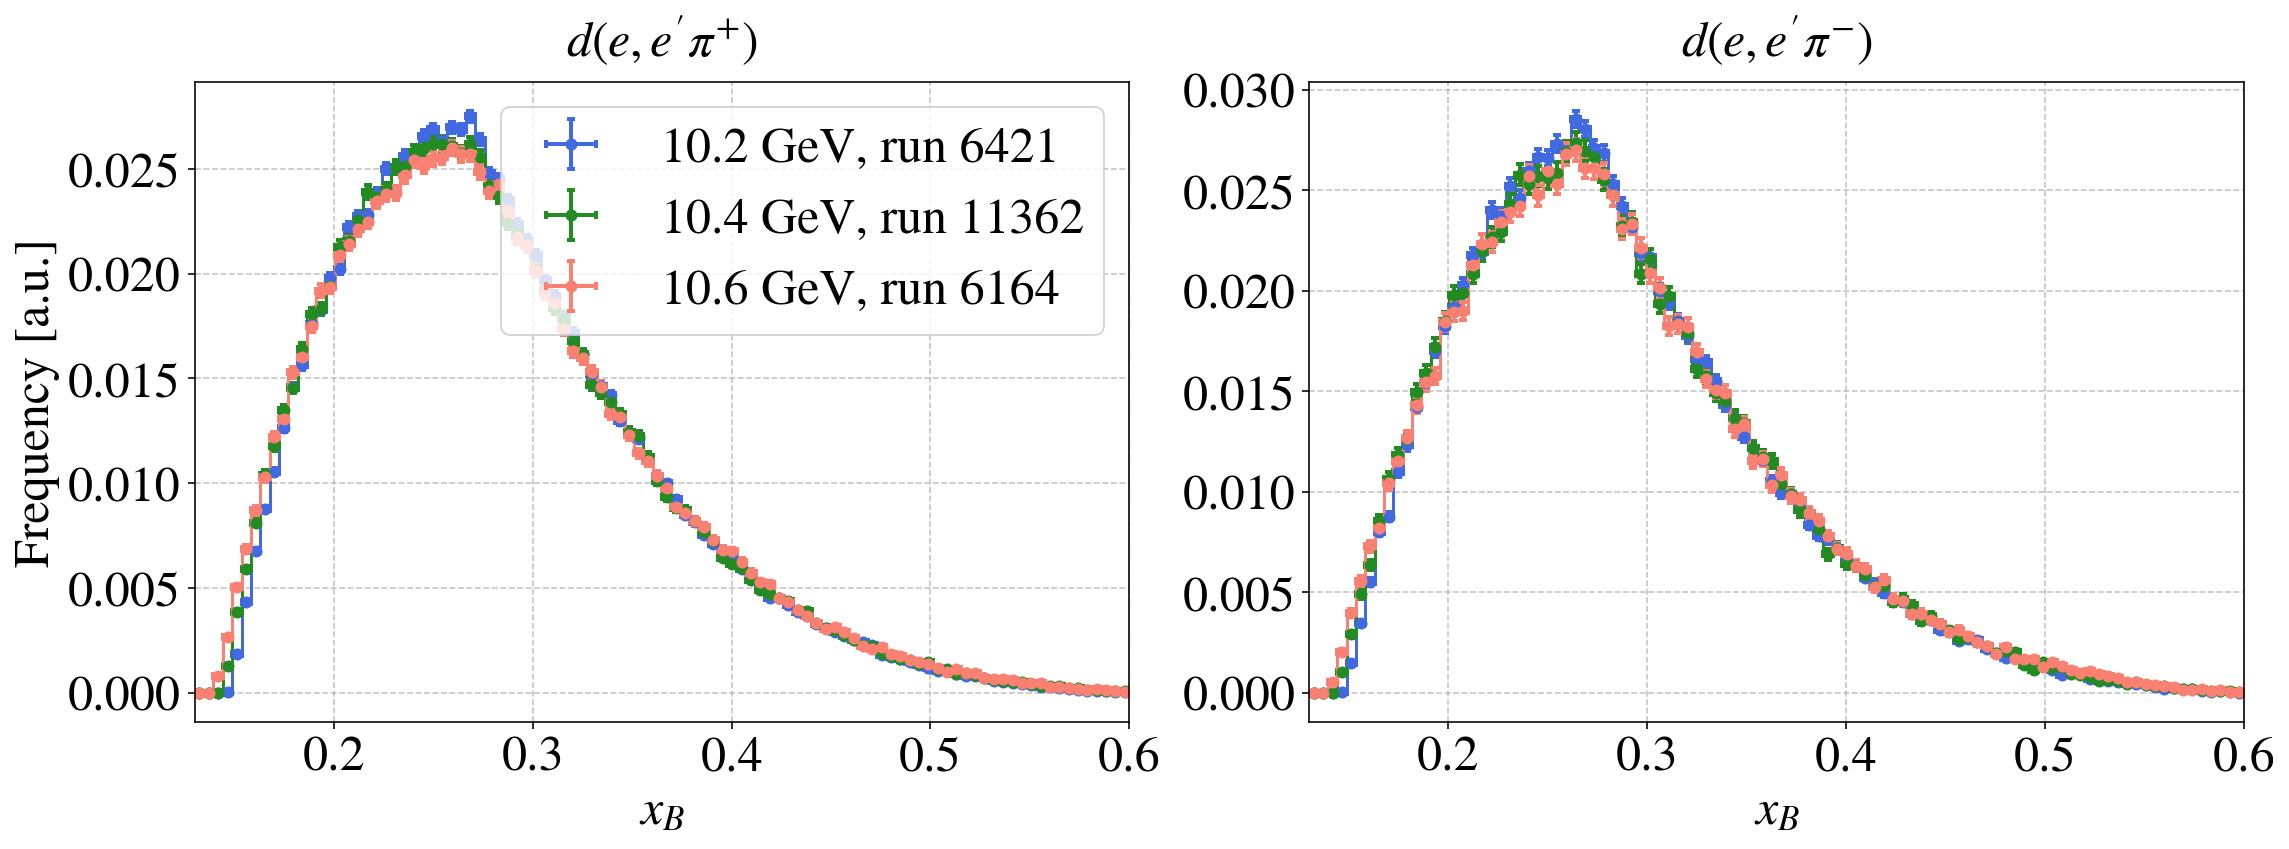

In [12]:
plot_var_comparison_between_runs('xB',xlabel='$x_B$',bins = np.linspace(0.13,0.6,101))

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/run_period_comparison_Zpi.pdf


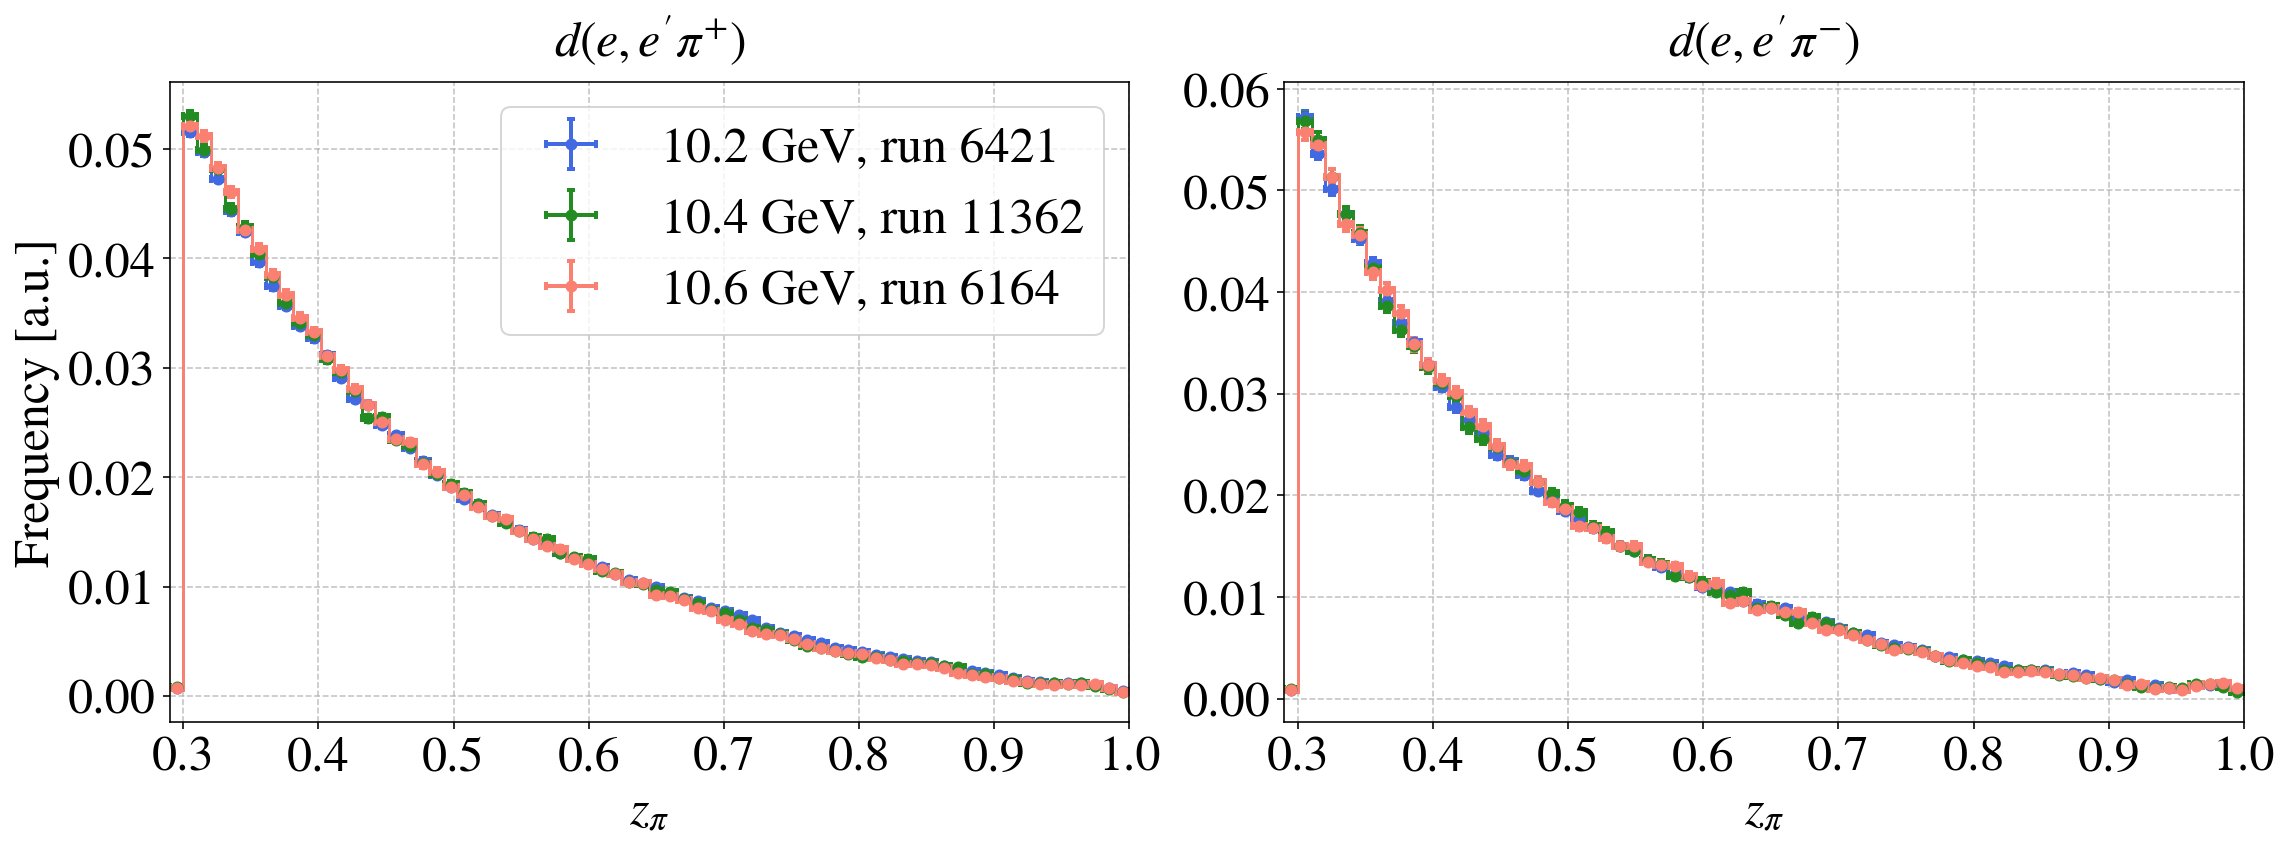

In [13]:
plot_var_comparison_between_runs('Zpi',xlabel='$z_\pi$',bins = np.linspace(0.29,1.0,71))

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/run_period_comparison_W.pdf


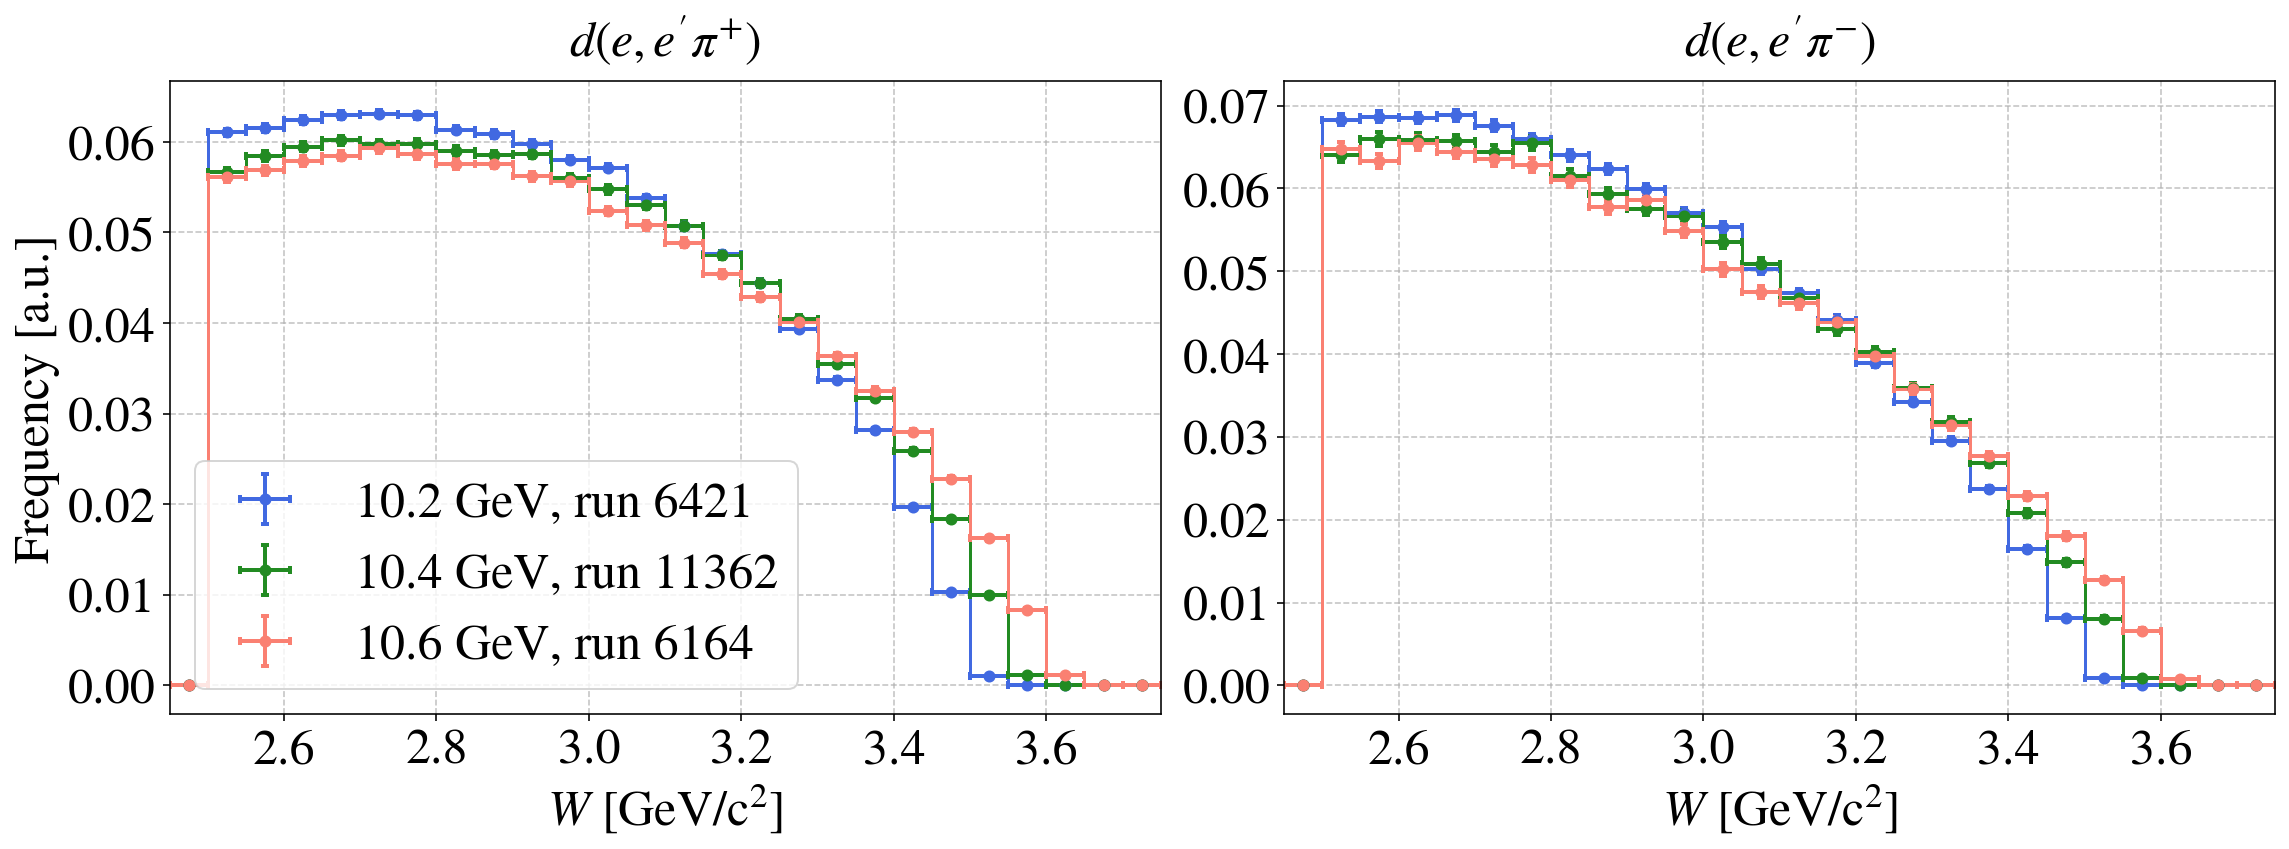

In [14]:
plot_var_comparison_between_runs('W',xlabel='$W$ [GeV/c$^2$]',bins = np.arange(2.45,3.8,0.05))

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/run_period_comparison_eta_pi.pdf


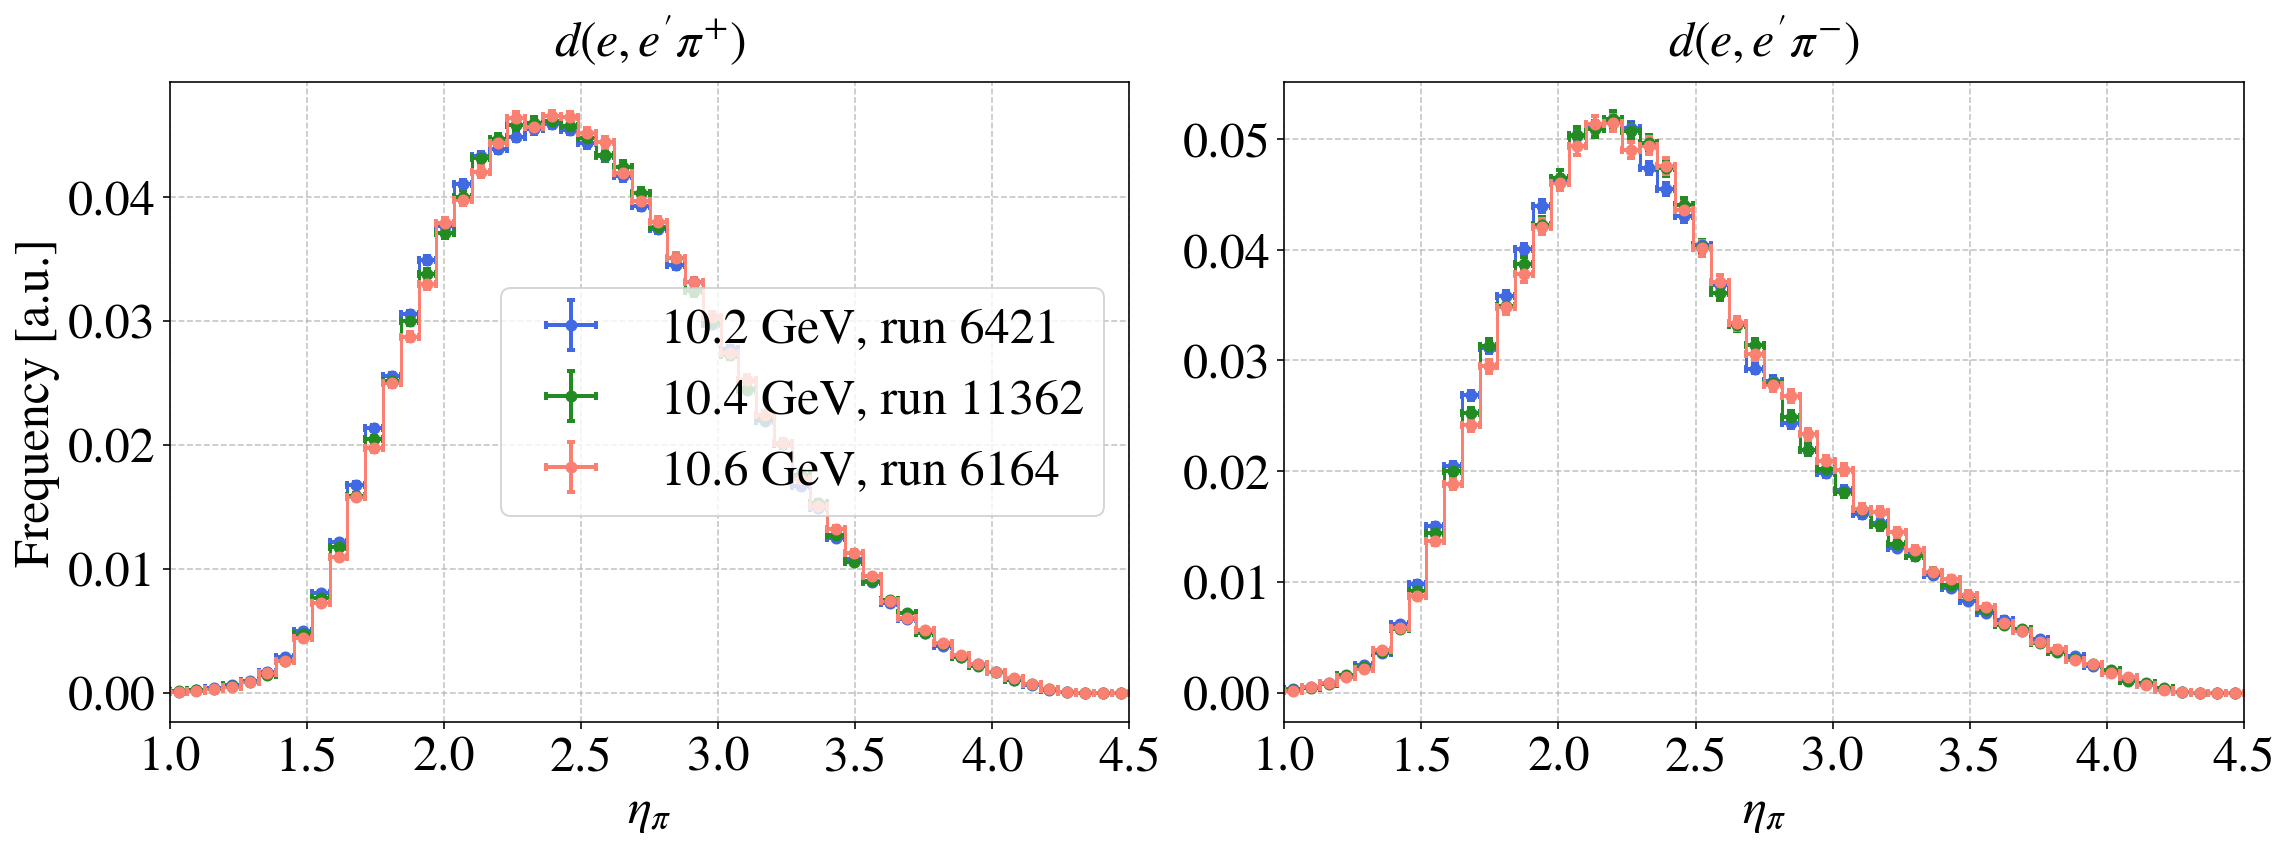

In [15]:
plot_var_comparison_between_runs('eta_pi',xlabel='$\eta_{\pi}$',bins = np.linspace(1,4.5,55))

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/run_period_comparison_xF.pdf


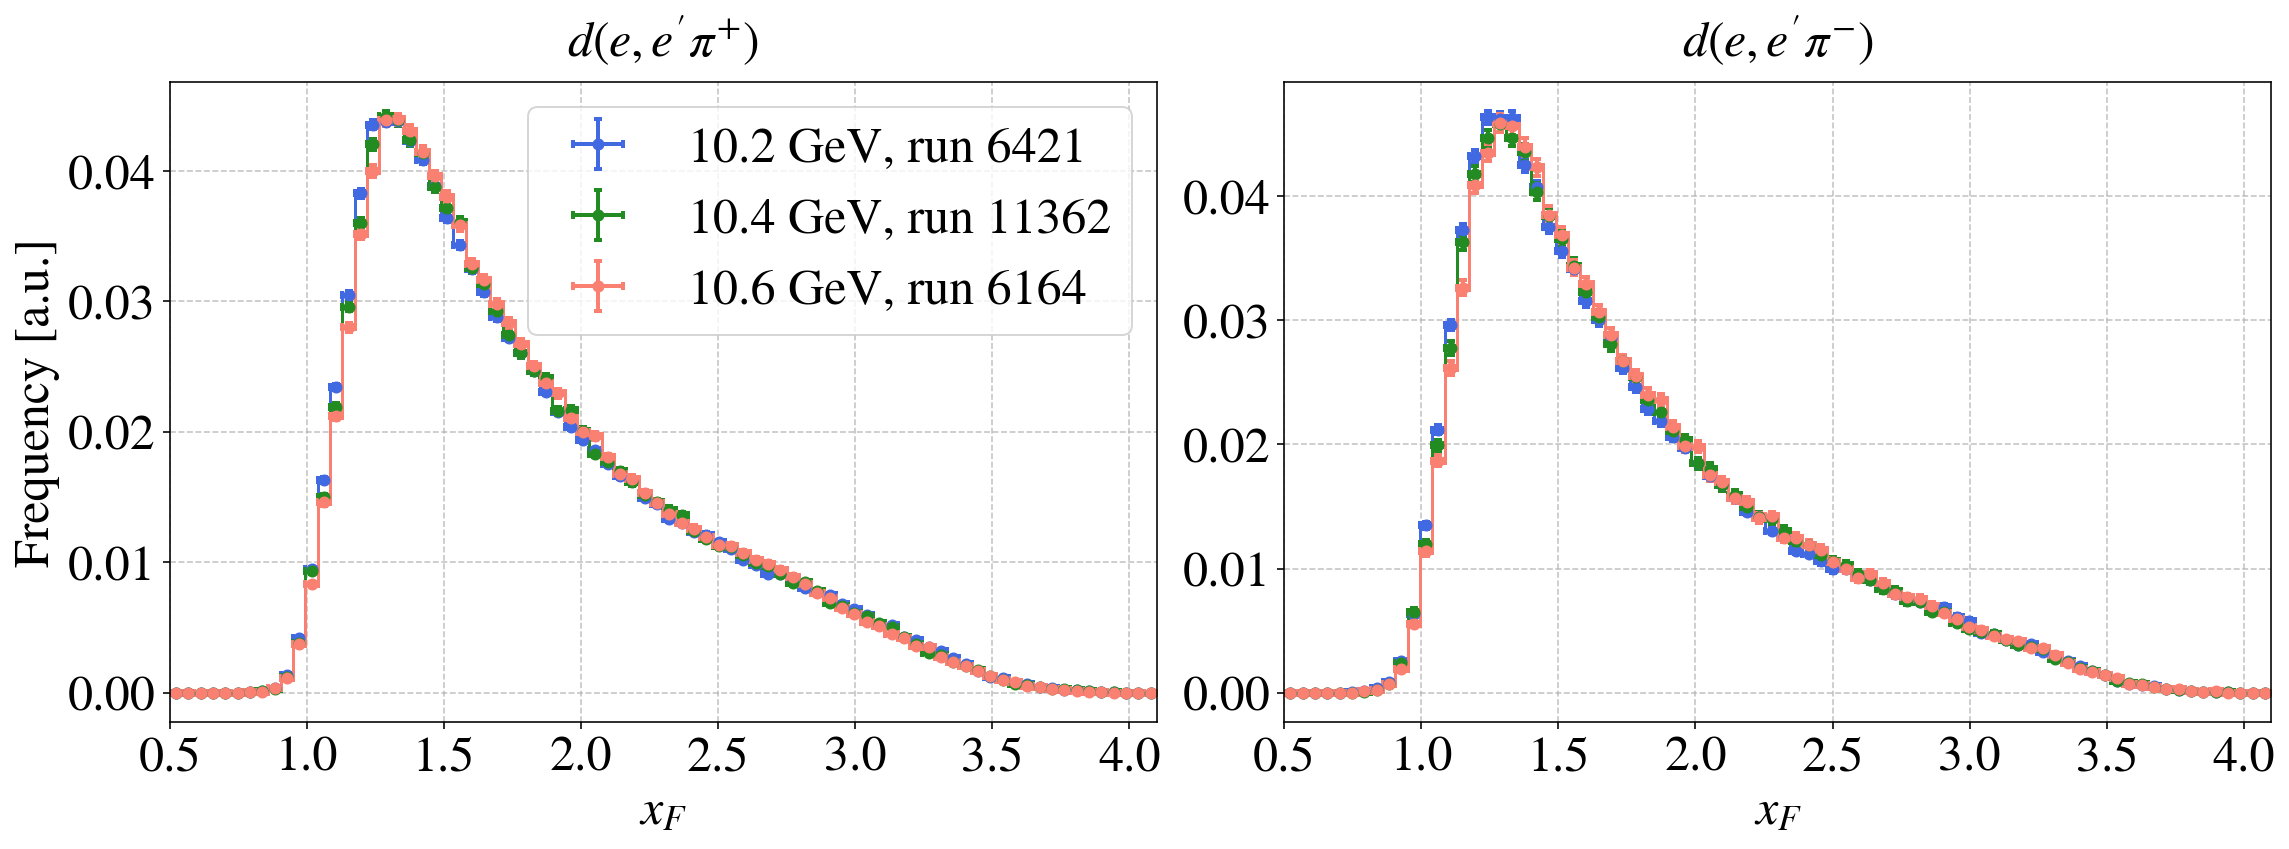

In [16]:
plot_var_comparison_between_runs(var  = 'xF',bins = np.linspace(0.5,4.1,81),  xlabel = '$x_{F}$')

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/run_period_comparison_pi_qFrame_pT.pdf


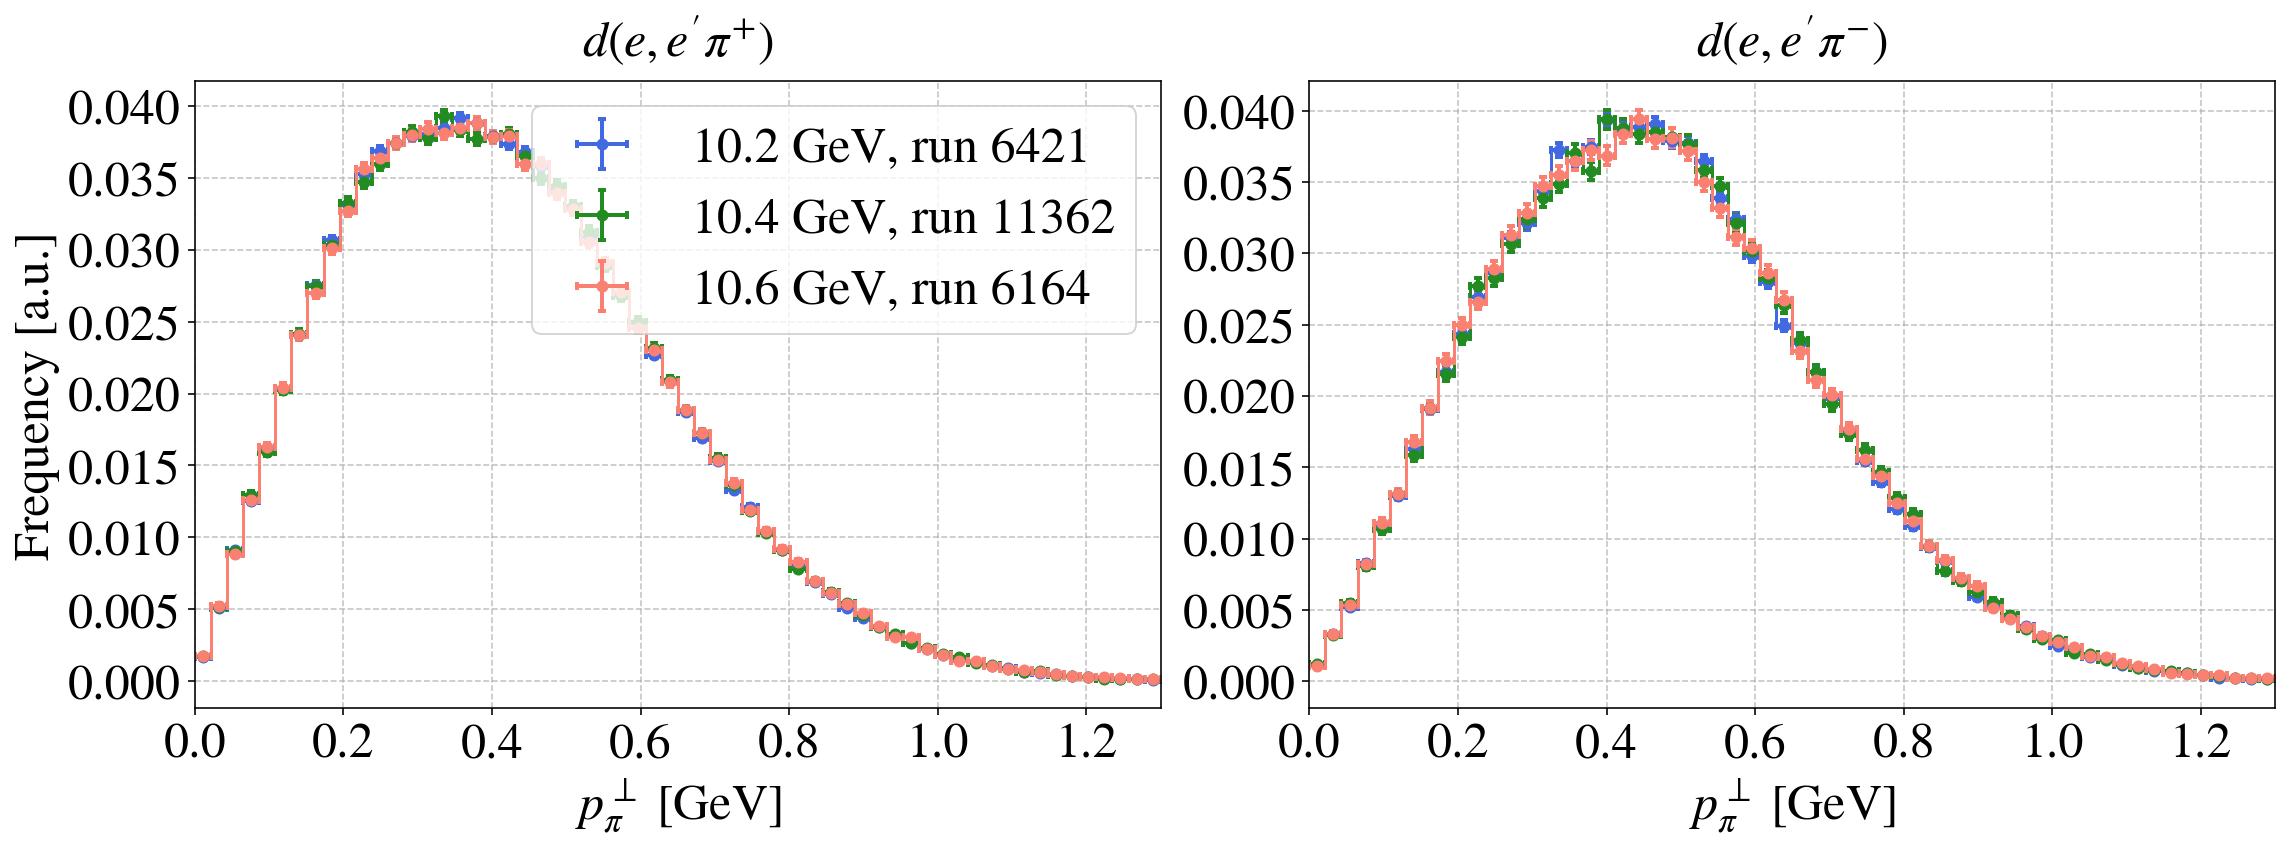

In [17]:
plot_var_comparison_between_runs('pi_qFrame_pT',bins=np.linspace(0,1.3,61),xlabel = '$p_{\pi}^{\perp}$ [GeV]')

# (4) Event count rate per run

In [30]:
Nevents = dict()
dfRate = pd.DataFrame()
for run in beam_charge_all_runs.runnum:
    # print('run',run)
    beamCharge = float(beam_charge_all_runs[beam_charge_all_runs.runnum==run].iloc[0]['Beam Charge [nC]'])
    for pi_ch,pi_print in zip(pi_charge_names,pi_prints):#{
        filename = data_path + "skimmed_SIDIS_sidisdvcs_%06d_e_%s_selected_eepi_kinematics.csv"%(run,pi_ch)
        Nevents[pi_ch] = count_lines_enumrate(filename)
    #}
    dfRate = pd.concat([dfRate,
                            pd.DataFrame({
                                'Run'              :run,
                                '$E$ [GeV]'        :beam_energy_from_run(run),
                                'Charge [nC]'      :beamCharge,
                                '$N_\pi^{+}$'      :Nevents['piplus'],
                                '$N_\pi^{-}$'      :Nevents['piminus'],
                                '$\Gamma_\pi^{+}$ [Cts/nC]':Nevents['piplus']/ beamCharge ,
                                '$\Gamma_\pi^{-}$ [Cts/nC]':Nevents['piminus'] / beamCharge,

                                '$\Delta\Gamma_\pi^{+}$ [Cts/nC]':np.sqrt(Nevents['piplus']) / beamCharge,
                                '$\Delta\Gamma_\pi^{-}$ [Cts/nC]':np.sqrt(Nevents['piminus'])/ beamCharge,
                            },index=[run])])
# display(dfRate)

In [31]:
dfRate['$R_{\pi^{+}/\pi^{-}}$'] = dfRate['$N_\pi^{+}$']/dfRate['$N_\pi^{-}$']
dfRate['$\Delta R_{\pi^{+}/\pi^{-}}$'] = dfRate['$R_{\pi^{+}/\pi^{-}}$'] * np.sqrt(1./dfRate['$N_\pi^{+}$']
                                                                                   + 1./dfRate['$N_\pi^{-}$'])

display(dfRate)

,Run,$E$ [GeV],Charge [nC],$N_\pi^{+}$,$N_\pi^{-}$,$\Gamma_\pi^{+}$ [Cts/nC],$\Gamma_\pi^{-}$ [Cts/nC],$\Delta\Gamma_\pi^{+}$ [Cts/nC],$\Delta\Gamma_\pi^{-}$ [Cts/nC],$R_{\pi^{+}/\pi^{-}}$,$\Delta R_{\pi^{+}/\pi^{-}}$
6484,6484,10.2,560589.000000,431153,177916,0.769107,0.317373,0.001171,0.000752,2.423351,0.006829
6453,6453,10.2,522578.000000,397104,165027,0.759894,0.315794,0.001206,0.000777,2.406297,0.007048
6249,6249,10.6,144340.954925,135691,57107,0.940073,0.395640,0.002552,0.001656,2.376083,0.011852
6329,6329,10.6,574943.478950,432319,180158,0.751933,0.313349,0.001144,0.000738,2.399666,0.006729
11443,11443,10.4,46326.100000,37544,15684,0.810429,0.338556,0.004183,0.002703,2.393777,0.022759
...,...,...,...,...,...,...,...,...,...,...,...
6476,6476,10.2,374049.000000,286111,118504,0.764902,0.316814,0.001430,0.000920,2.414357,0.008340
6462,6462,10.2,542215.000000,415006,172486,0.765390,0.318114,0.001188,0.000766,2.406027,0.006893
6489,6489,10.2,534213.000000,411381,170596,0.770069,0.319341,0.001201,0.000773,2.411434,0.006944
11512,11512,10.4,240127.000000,189885,79267,0.790769,0.330104,0.001815,0.001172,2.395511,0.010130


saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/RunPeriodComparison/EventRatePerUnitCharge.pdf


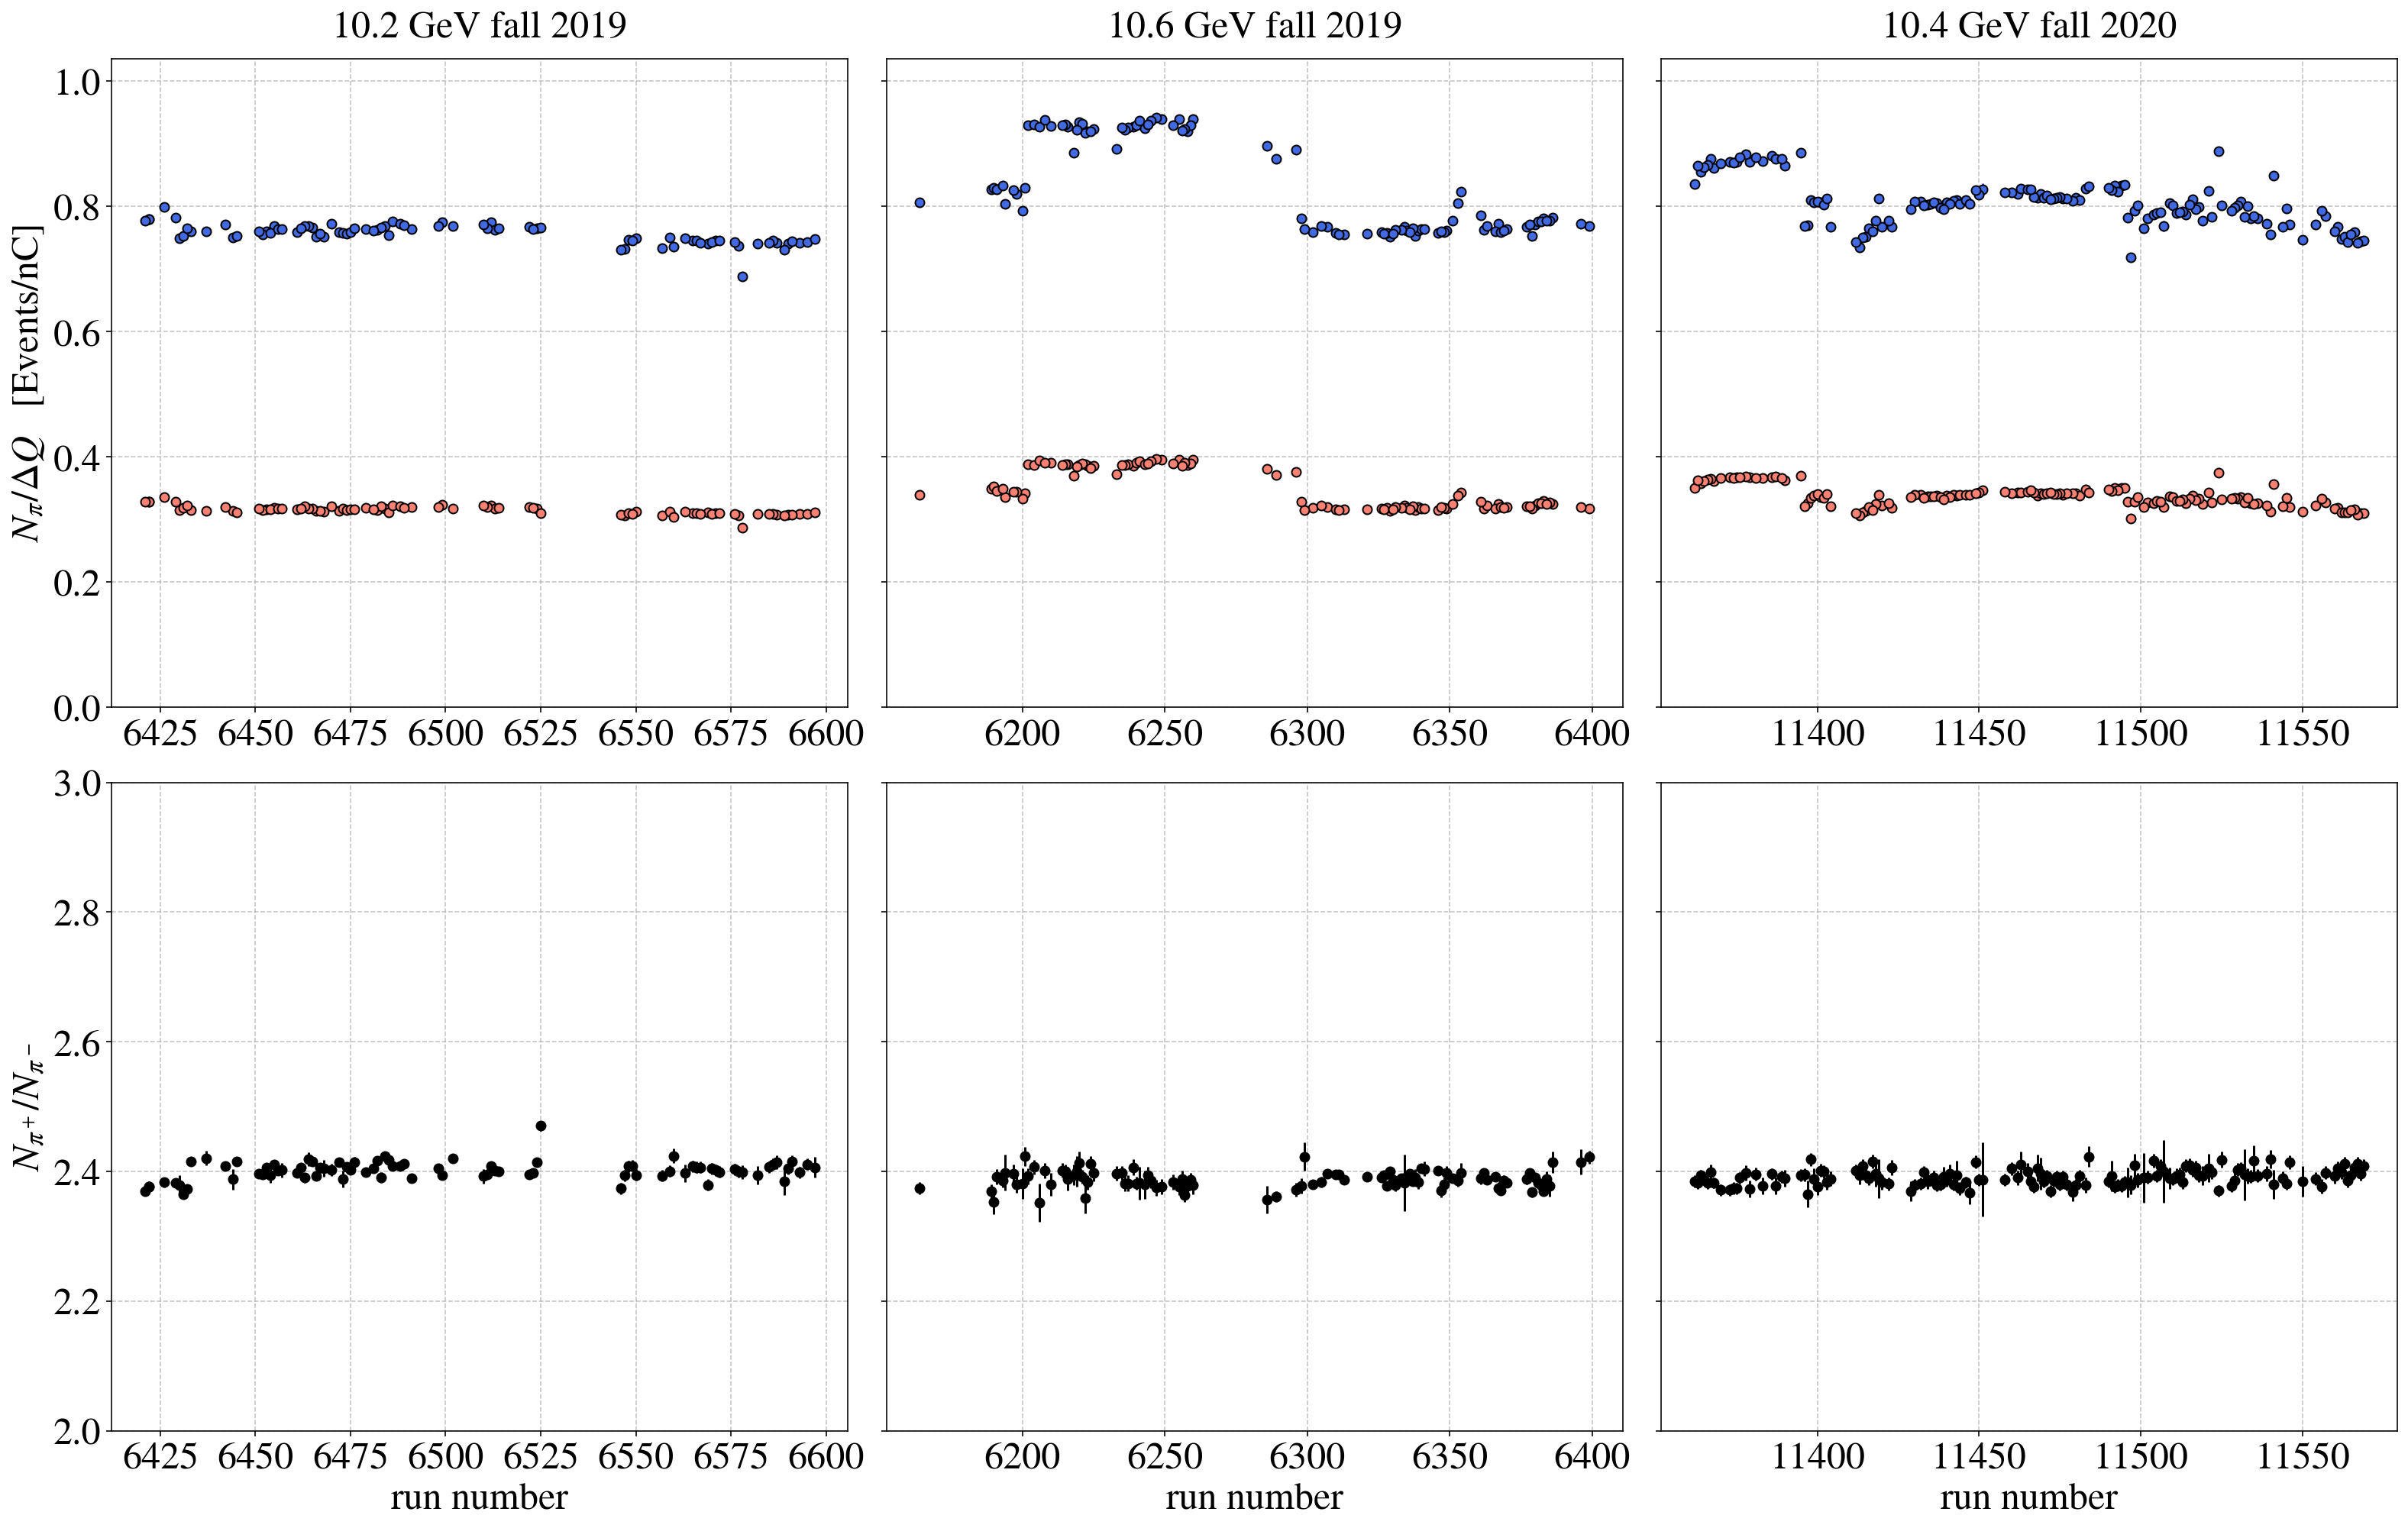

In [34]:
ylim = (0,1.1*np.max(dfRate['$\Gamma_\pi^{+}$ [Cts/nC]']))
fig = plt.figure(figsize=(22,14),tight_layout=True)

for E,title,E_idx in zip([10.2,10.6,10.4],                             
                         ['10.2 GeV fall 2019','10.6 GeV fall 2019','10.4 GeV fall 2020'],                         
                         [1,2,3]):
    
    df = dfRate[dfRate['$E$ [GeV]']==E]
    
    # number of π+ and π-
    ax = fig.add_subplot(2,3,E_idx)    
    for pi_ch,pi_print,pi_color,pi_label in zip(pi_charge_names,pi_prints,pi_colors,pi_labels):#{
        
        plt.errorbar(x=df.Run, 
                     y=df['$\Gamma_%s$ [Cts/nC]'%pi_label], 
                     yerr=df['$\Delta\Gamma_%s$ [Cts/nC]'%pi_label], 
                     marker='o', markeredgecolor='k',linestyle='',capthick=2,color=pi_color);
        
    set_axes(ax,'','$N_{\pi}/\Delta Q$   [Events/nC]' if E_idx==1 else '',
             title=title,
             do_add_legend=False,
             ylim=ylim,
             remove_ticks_y=False if E_idx==1 else True,
             do_add_grid=True);

    # rate of π+/π-
    ax = fig.add_subplot(2,3,E_idx+3)    
    plt.errorbar(x=df.Run, 
                 y=df['$R_{\pi^{+}/\pi^{-}}$'],                      
                 yerr=df['$\Delta R_{\pi^{+}/\pi^{-}}$'],                      
                 marker='o', markeredgecolor='k',linestyle='',capthick=2,color='k');
        
    set_axes(ax,'run number','$N_{\pi^+}/N_{\pi^-}$' if E_idx==1 else '',
             title='',
             do_add_legend=False,
             ylim=(2,3),
             remove_ticks_y=False if E_idx==1 else True,             
             do_add_grid=True);

#}
save_figure(filename = figures_path+'EventRatePerUnitCharge' + '.pdf')